# Análisis de Componentes Principales (PCA)

## Análisis de las variables sin normalizar (Boxplot)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import Utils

COLORS = ["#003049", "#d62828", "#f77f00", "#fcbf49", "#eae2b7", "#007F83", "#BC3C28", "#FFD56B", "#006A4E"]

DATASET_PATH = "../resources/europe.csv"

dataset = pd.read_csv(DATASET_PATH)



In [82]:
def show_boxplot(dataset):
    
    fig, ax = plt.subplots()

    boxplot = ax.boxplot(dataset.select_dtypes(include='number').values, patch_artist=True)

    for patch, color in zip(boxplot['boxes'], COLORS):
        patch.set_facecolor(color)

    ax.set_xticklabels(dataset.columns[1:], rotation=45, ha="right")

    plt.tight_layout()

    plt.show()

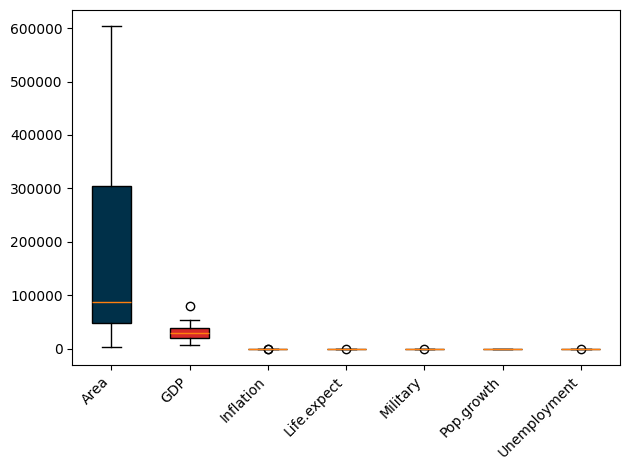

In [83]:

show_boxplot(dataset)

Como se puede apreciar, al no estar los datos estandarizados, la variable Area de los países es la predominante y por su magnitud no deja ver las demás variables.

Se aplica el z-score para estandarizarlos, y se obtiene lo siguiente:

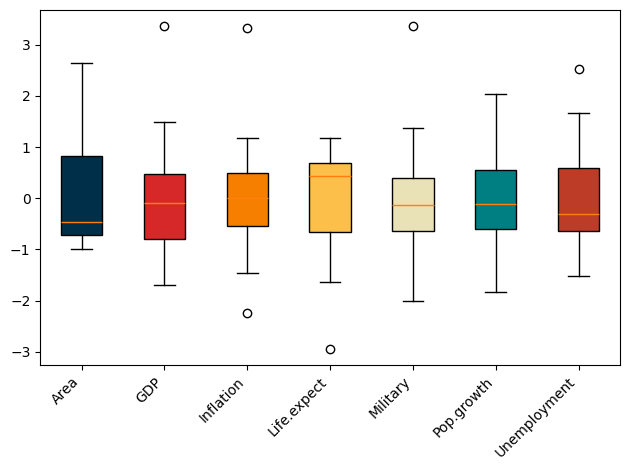

In [84]:
standarizedDataset = Utils.zScoreData(dataset)
show_boxplot(standarizedDataset)

Para realizar el análisis de componentes principales, se calcula la matriz de correlaciones en lugar de la matriz de covarianzas, proque los datos ya están estandarizados:

In [85]:
Sx = np.corrcoef(standarizedDataset.select_dtypes(include='number').values, rowvar=False)
print(Sx)

[[ 1.         -0.13851689  0.32008964 -0.02167065  0.10169131 -0.08862071
   0.02544918]
 [-0.13851689  1.         -0.49275512  0.70097781 -0.28446264  0.76042363
  -0.52775598]
 [ 0.32008964 -0.49275512  1.         -0.67919262  0.04828252 -0.47874553
   0.19877418]
 [-0.02167065  0.70097781 -0.67919262  1.         -0.06324906  0.77162899
  -0.24597534]
 [ 0.10169131 -0.28446264  0.04828252 -0.06324906  1.         -0.28234749
   0.29227872]
 [-0.08862071  0.76042363 -0.47874553  0.77162899 -0.28234749  1.
  -0.17476925]
 [ 0.02544918 -0.52775598  0.19877418 -0.24597534  0.29227872 -0.17476925
   1.        ]]


A partir de esta matriz, se calculan los autovalores ordenados descendentemente:

In [86]:
evalues, evectors = np.linalg.eig(Sx) 
indices = np.argsort(np.abs(evalues))[::-1]
sortedEvalues = evalues[indices]
print(sortedEvalues)


[3.22716568 1.18712341 1.06319053 0.77035598 0.45784862 0.16867389
 0.12564189]


La primer componente será entonces la combinación lineal de los componentes del autovector asociado al mayor autovalor, es decir a λ=3.22716568.
El autovector en cuestión es:

In [87]:
sortedEvectors = evectors[:, indices]
print(sortedEvectors[0])

[-0.1248739   0.1728722   0.89829674  0.0448504  -0.32401693  0.19011808
 -0.06664282]


El componente principal PC1 será entonces combinación lineal de estos valores:

PC1 = -0.1248739 * Area + 0.1728722 * GDP + 0.89829674 * Inflation + 0.0448504 * Life.expect + -0.32401693 * Military + 0.19011808 * Pop.growth + -0.06664282 * Unemployment

## Interpretación de PC1

Como se puede observar, en PC1 la variable que más influye por diferencia es la inflación, seguida por el poder militar de manera inversa. Es decir, una alta inflación hace aumentar PC1 mientras que un alto poder militar lo hace bajar. En menor medida, también influyen el crecimiento poblacional y el GPD del país.

### PC1 y PC2 por país

In [88]:
countries = dataset['Country']
countryData = standarizedDataset.select_dtypes(include='number').values
PCsDataset = pd.DataFrame({
    'Country': countries,
    'PC1': np.dot(countryData, sortedEvectors[0]),
    'PC2': np.dot(countryData, sortedEvectors[1]),
})
print(PCsDataset)


           Country       PC1       PC2
0          Austria  0.678892 -1.189855
1          Belgium  0.436632 -0.841601
2         Bulgaria -0.427627 -0.875096
3          Croatia -1.288583  0.316690
4   Czech Republic -0.817040 -1.031983
5          Denmark  0.039519 -0.694266
6          Estonia  0.468967 -0.814724
7          Finland -0.236535  0.471580
8          Germany -0.603173 -0.261318
9           Greece -1.258155  1.668234
10         Hungary  0.038831 -0.441279
11         Iceland  1.479569 -0.466039
12         Ireland  0.330485  0.986367
13           Italy -0.307123  0.570096
14          Latvia  0.395411 -1.156963
15       Lithuania  0.431432 -0.690876
16      Luxembourg  1.497220  0.501029
17     Netherlands -0.208518 -0.471379
18          Norway -1.087362  0.339989
19          Poland  0.046169  0.541539
20        Portugal -0.103578  0.359812
21        Slovakia  0.474516 -0.342731
22        Slovenia -1.107536 -0.730413
23           Spain -0.185455  2.395522
24          Sweden -0.188

## Biplot

Ahora se realiza el Biplot para encontrar relaciones entre los países:

['Area' 'GDP' 'Inflation' 'Life.expect' 'Military' 'Pop.growth'
 'Unemployment']


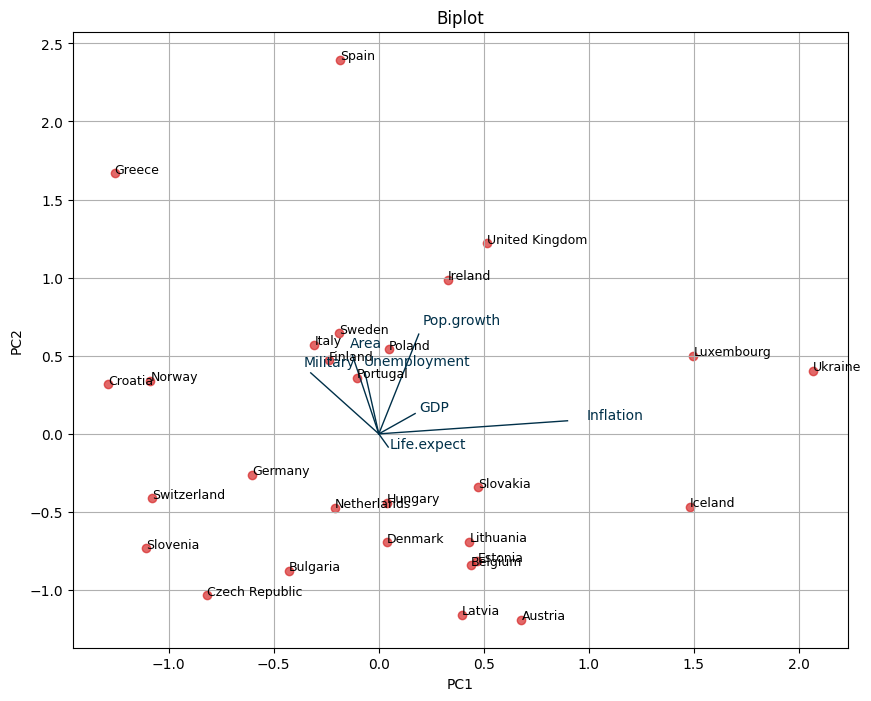

In [104]:
import pandas as pd

plt.figure(figsize=(10, 8))

plt.scatter(PCsDataset['PC1'], PCsDataset['PC2'], alpha=0.7, c=COLORS[1])

for i, country in enumerate(PCsDataset['Country']):
    plt.annotate(country, (PCsDataset['PC1'][i], PCsDataset['PC2'][i]), fontsize=9)

trasposedMatrix = np.transpose([sortedEvectors[0], sortedEvectors[1]])

vectors = np.array(trasposedMatrix)
vectorLabels = np.array(dataset.columns[1:])

origin = [0, 0]

for i, vector in enumerate(vectors):
    plt.plot([origin[0], vector[0]], [origin[1], vector[1]], color=COLORS[0], lw=1)
    plt.text(vector[0]*1.1, vector[1]*1.1, vectorLabels[i], color=COLORS[0])
    

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')

plt.grid(True)

plt.show()

En base al Biplot, se puede concluir que:

* En Ucrania y Luxemburgo, la variable Inflación tiene mucho peso.

* España es el país que por diferencia más influye la superficie de su territorio.

* En Reino Unido e Irlanda, el crecimiento poblacional tienen más peso.

* A mayor gasto militar, menor expectativa de vida.

* Hay algunos clústeres que se pueden identificar:

    * Italia, Finalandia, Polonia, Suecia y Portugal
    * Croacia y Noruega
    * Eslovaquia, Lituania, Estonia, Bélgica, Lavtia y Austia
    * Hungría, Dinamarca y Holanda
    * Alemania, Suiza
